In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_640_validated.csv', encoding = 'macroman')

In [3]:

d = df['B2'].replace('1 day', 1)
d = d.replace('No self-isolation/social distancing', 0)
d = d.replace('3 days', 1)
d = d.replace('4 days', 1)
d = d.replace('5 days', 1)
d = d.replace('6 days', 1)
d = d.replace('7 days', 1)
d = d.replace('More than a week', 2)
d = d.replace('More than 2 weeks', 3)
d = d.replace('More than 3 weeks', 4)
d = d.replace('More than a month', 5)
df['B2'] = d
df['B2'].value_counts()


C:\Users\bharg\AppData\Local\Temp\ipykernel_32368\3257884213.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('More than a month', 5)


B2
5    403
0    111
4     45
3     42
2     20
1     19
Name: count, dtype: int64

In [4]:
list = [12] + [i for i in range(36,64)]

df = df.iloc[:, list]

df

,B2,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E19,E20,E21,E22,E23,E24,E25,E26,E27,E28
0,5,4,4,4,1,3,5,3,3,2,...,4,4,3,3,2,1,4,4,3,4
1,5,4,4,3,2,3,5,5,5,4,...,2,3,4,3,3,3,4,4,3,4
2,5,4,4,4,3,4,5,5,5,4,...,2,3,4,3,4,3,4,4,4,4
3,5,3,4,4,4,3,5,5,5,5,...,3,4,3,4,2,1,4,4,3,4
4,4,4,3,3,4,2,5,5,5,2,...,3,3,2,2,2,2,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,5,2,2,3,1,2,4,4,5,4,...,3,4,3,3,2,2,3,3,2,3
636,5,4,4,4,4,4,5,5,5,5,...,4,4,4,4,4,4,4,4,3,4
637,5,4,4,2,2,4,5,5,5,5,...,3,3,3,3,3,2,4,2,4,3
638,5,3,4,2,3,4,3,4,3,3,...,4,2,2,2,3,2,4,4,4,4


In [5]:
X = df.drop('B2', axis=1)
y = df['B2']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [8]:
test_score = rf_model.score(X_test, y_test)

# Print test accuracy with 4 decimal places
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.6875


<Figure size 800x600 with 0 Axes>

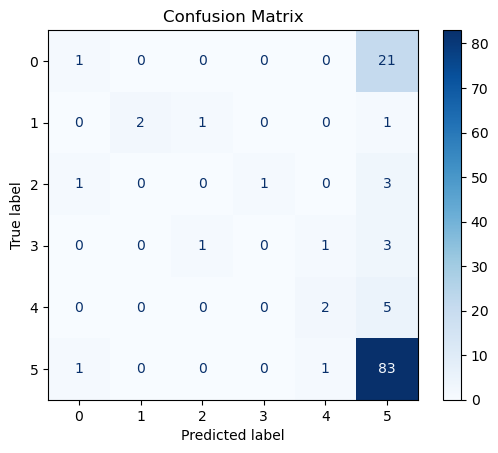

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels for test data
y_pred = rf_model.predict(X_test)

# Create confusion matrix comparing true labels and predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # Initialize plot with specified size
ConfusionMatrixDisplay(cm).plot(cmap="Blues")   # We have plot the confusion matric with color blue
plt.title("Confusion Matrix")
plt.show()